In [2]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn
import psycopg2 as psy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Project

The aim of this project is to identify clusters (that are meaningful, useful, or both that share common characteristics) of flight delays for FAA regulated airports in the US). Data includes name of airport, state, city, operational year (from 2004 to 2010), departures, arrivals, cancelations, numbers of delays and diversions, average delay times for a number of operational processes (such as taxi-out, taxi-in, airborne time, etc.). Please see detailed description of the features here: http://aspmhelp.faa.gov/index.php/APM:_Analysis:_Definitions_of_Variables


## Part 2: Exploratory Data Analysis and Clusters

In [ ]:
# I prefer to clean and merge my data in Pandas again

air_oper = pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-07/assets/Airport_operations.csv',)
air_canc = pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-07/assets/airport_cancellations.csv')
air_info =pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-07/assets/airports.csv')

In [ ]:
air_oper.columns = ['airport', 'year','dept_comp','arriv_comp', 'ontime_gate_dept', 'ontime_air_dept','ontime_gate_arriv','gate_delay','taxi_out_time','taxi_out_delay', 'air_dept_delay','airborn_delay','taxi_in_delay','block_delay', 'gate_arrive_delay']

In [ ]:
air_canc.columns = ['airport', 'year','dept_cancel','arriv_cancel', 'dept_diversions', 'arriv_diversions']

In [ ]:
air_info.columns = ['key', 'airport','ap_name','alias', 'fac_type', 'faa_region', 'county','city','state', 'ap_type', 'latitude', 'longitude', 'bound_data']

In [ ]:
air_oper.info()

In [ ]:
air_canc.info()

In [ ]:
air_info.info()

In [ ]:
df1=air_oper.merge(air_canc, on=['airport', 'year']);


In [ ]:
df1.info()

In [ ]:
df=air_info.merge(df1)
df

In [ ]:
# This is the final file I will be working with

df.to_csv(path_or_buf="/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-07/data.csv", index=False)

#### 2.1 Plot and Describe the Data

In [2]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn
import psycopg2 as psy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


df =pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-07/data.csv')

In [3]:
df.describe()

,key,latitude,longitude,year,dept_comp,arriv_comp,ontime_gate_dept,ontime_air_dept,ontime_gate_arriv,gate_delay,...,taxi_out_delay,air_dept_delay,airborn_delay,taxi_in_delay,block_delay,gate_arrive_delay,dept_cancel,arriv_cancel,dept_diversions,arriv_diversions
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,...,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,1714.484355,36.448807,-94.899998,2009.016270,113471.568210,113003.959950,0.779123,0.726958,0.766864,12.890250,...,3.683292,15.703504,2.875532,1.414155,3.290826,13.428811,1299.314143,1341.068836,174.250313,170.256571
std,1005.059201,6.686781,20.644996,3.150126,98059.144667,97705.308115,0.052279,0.076027,0.050502,3.036474,...,2.337325,4.364217,1.169739,0.854702,0.989275,3.251647,1840.877193,1980.459892,172.638408,229.162686
min,246.000000,18.439295,-157.922429,2004.000000,731.000000,717.000000,0.529900,0.380800,0.513600,5.350000,...,0.100000,6.290000,0.950000,0.020000,1.330000,6.330000,0.000000,0.000000,0.000000,0.000000
25%,770.000000,32.896828,-111.977773,2006.000000,42064.000000,42006.500000,0.753100,0.691800,0.742150,10.830000,...,2.300000,12.890000,2.035000,0.845000,2.615000,11.270000,349.000000,314.500000,62.000000,41.000000
50%,1531.000000,37.618972,-87.897068,2009.000000,79489.000000,79750.000000,0.784100,0.740200,0.770500,12.540000,...,3.050000,15.130000,2.620000,1.140000,3.130000,12.970000,670.000000,653.000000,111.000000,84.000000
75%,2502.000000,40.795250,-80.152741,2012.000000,166469.500000,165560.500000,0.810700,0.773700,0.797600,14.620000,...,4.220000,17.555000,3.550000,1.775000,3.815000,14.935000,1483.500000,1542.000000,237.000000,190.000000
max,3575.000000,61.174083,-66.002004,2014.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,25.840000,...,18.940000,40.510000,7.820000,6.180000,7.520000,27.780000,16618.000000,17571.000000,1064.000000,1948.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 31 columns):
key                  799 non-null float64
airport              799 non-null object
ap_name              799 non-null object
alias                799 non-null object
fac_type             799 non-null object
faa_region           799 non-null object
county               799 non-null object
city                 799 non-null object
state                799 non-null object
ap_type              799 non-null object
latitude             799 non-null float64
longitude            799 non-null float64
bound_data           799 non-null object
year                 799 non-null int64
dept_comp            799 non-null int64
arriv_comp           799 non-null int64
ontime_gate_dept     799 non-null float64
ontime_air_dept      799 non-null float64
ontime_gate_arriv    799 non-null float64
gate_delay           799 non-null float64
taxi_out_time        799 non-null float64
taxi_out_delay       799 non-

In [5]:
df_working=df.iloc[:, 14:]
df_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 17 columns):
dept_comp            799 non-null int64
arriv_comp           799 non-null int64
ontime_gate_dept     799 non-null float64
ontime_air_dept      799 non-null float64
ontime_gate_arriv    799 non-null float64
gate_delay           799 non-null float64
taxi_out_time        799 non-null float64
taxi_out_delay       799 non-null float64
air_dept_delay       799 non-null float64
airborn_delay        799 non-null float64
taxi_in_delay        799 non-null float64
block_delay          799 non-null float64
gate_arrive_delay    799 non-null float64
dept_cancel          799 non-null float64
arriv_cancel         799 non-null float64
dept_diversions      799 non-null float64
arriv_diversions     799 non-null float64
dtypes: float64(15), int64(2)
memory usage: 106.2 KB


In [6]:
df_working.corr()

,dept_comp,arriv_comp,ontime_gate_dept,ontime_air_dept,ontime_gate_arriv,gate_delay,taxi_out_time,taxi_out_delay,air_dept_delay,airborn_delay,taxi_in_delay,block_delay,gate_arrive_delay,dept_cancel,arriv_cancel,dept_diversions,arriv_diversions
dept_comp,1.000000,0.999807,-0.063251,-0.399942,0.103680,0.131396,0.638656,0.604125,0.391838,0.401505,0.823040,0.358669,0.102899,0.808959,0.823676,0.934147,0.798750
arriv_comp,0.999807,1.000000,-0.062713,-0.399040,0.104228,0.129871,0.636674,0.603439,0.390470,0.400179,0.822057,0.355442,0.101622,0.809994,0.824622,0.934035,0.799456
ontime_gate_dept,-0.063251,-0.062713,1.000000,0.818598,0.782703,-0.913107,-0.169598,-0.212539,-0.764464,-0.265446,-0.162607,-0.342640,-0.712282,-0.183962,-0.172420,-0.051995,-0.142091
ontime_air_dept,-0.399942,-0.399040,0.818598,1.000000,0.695697,-0.826633,-0.653223,-0.725766,-0.954832,-0.558150,-0.495327,-0.561451,-0.753545,-0.466213,-0.453081,-0.357375,-0.431068
ontime_gate_arriv,0.103680,0.104228,0.782703,0.695697,1.000000,-0.800603,-0.230311,-0.287357,-0.712975,-0.271240,-0.087212,-0.550010,-0.922723,-0.113363,-0.094130,0.067575,-0.028064
gate_delay,0.131396,0.129871,-0.913107,-0.826633,-0.800603,1.000000,0.331777,0.339046,0.886479,0.328084,0.249073,0.435036,0.850259,0.291753,0.275300,0.124451,0.218199
taxi_out_time,0.638656,0.636674,-0.169598,-0.653223,-0.230311,0.331777,1.000000,0.923359,0.688469,0.611870,0.676826,0.600592,0.442335,0.566103,0.559625,0.571622,0.558053
taxi_out_delay,0.604125,0.603439,-0.212539,-0.725766,-0.287357,0.339046,0.923359,1.000000,0.733528,0.642913,0.665664,0.579919,0.469840,0.599671,0.588159,0.554316,0.581730
air_dept_delay,0.391838,0.390470,-0.764464,-0.954832,-0.712975,0.886479,0.688469,0.733528,1.000000,0.554790,0.504119,0.589096,0.838877,0.504939,0.487547,0.360954,0.444050
airborn_delay,0.401505,0.400179,-0.265446,-0.558150,-0.271240,0.328084,0.611870,0.642913,0.554790,1.000000,0.339570,0.514464,0.392012,0.376828,0.367273,0.280685,0.322749


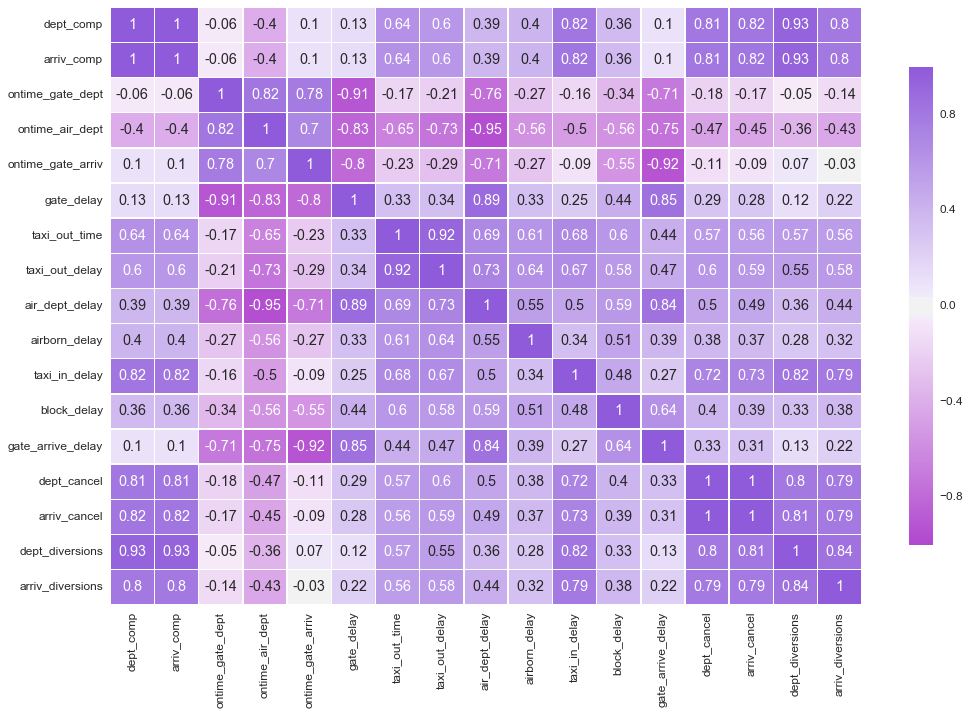

In [59]:

corr = df_working.corr().round(decimals=2)
sns.set(font_scale=1.2)
plt.subplots( figsize=(15,10))
cmap = sns.diverging_palette(295,278, as_cmap=True)
sns.heatmap (corr, annot=True,cmap=cmap,cbar_kws={"shrink": .8},linewidths=.5)


<img src="fig21.PNG">

### Conducting the PCA

In [8]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df_working)

In [9]:
covMat = np.cov(X_scaled.T)

In [10]:
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [11]:
print len(eigenValues)
print len(eigenVectors)

17
17


In [12]:
print eigenValues

[  9.17680918e+00   4.16210652e+00   1.21645796e+00   6.50383255e-01
   5.10203215e-01   4.20437718e-01   2.47407511e-01   1.90068175e-01
   1.65777857e-01   1.43298219e-01   6.19936947e-02   5.37682509e-02
   1.49627279e-02   4.86205637e-03   1.71481675e-04   9.58506528e-04
   1.63693067e-03]


In [13]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i)

(9.1768091844119741, array([ 0.25885192,  0.25856244, -0.16403238, -0.27252651, -0.14753752,
        0.20056695,  0.26942785,  0.27543982,  0.27938877,  0.20144222,
        0.26722246,  0.22120597,  0.21000452,  0.26978265,  0.26812843,
        0.2490268 ,  0.25444485]))
(4.1621065164993274, array([-0.27201661, -0.27262998, -0.35033858, -0.22987049, -0.40101409,
        0.34147483, -0.04027149, -0.01939918,  0.23585036,  0.05481243,
       -0.17685623,  0.11913483,  0.33438795, -0.1756687 , -0.18689229,
       -0.27019983, -0.20487635]))
(1.2164579579257784, array([ 0.08042275,  0.08247427, -0.33007295,  0.00240815, -0.0884481 ,
        0.25730877, -0.4143432 , -0.39593382, -0.0058805 , -0.48508062,
        0.04518497, -0.28841959,  0.03846376,  0.21062511,  0.21894847,
        0.17614028,  0.17300264]))
(0.65038325526119545, array([ 0.09471498,  0.09625113, -0.2687089 , -0.29171776,  0.29493075,
        0.15272971,  0.07360325,  0.11988738,  0.18569113,  0.29895645,
       -0.10673434

In [14]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

print(varExpl)

[53.91366950718367, 24.452337481899907, 7.1466793081408477, 3.8209956393906652, 2.9974391944526655, 2.47006772182415, 1.4535168501077671, 1.1166487800724882, 0.9739433861212623, 0.84187571752339285, 0.36421238598591554, 0.31588797947822683, 0.08790588842764728, 0.028564536450887589, 0.0096169526448265461, 0.0056312170320047018, 0.0010074532637094511]


In [15]:

cvarex = np.cumsum(varExpl);
cvarex
# I indetified 3 main componets that are responsible for 85.5% variance in airport delays. 

array([  53.91366951,   78.36600699,   85.5126863 ,   89.33368194,
         92.33112113,   94.80118885,   96.2547057 ,   97.37135448,
         98.34529787,   99.18717359,   99.55138597,   99.86727395,
         99.95517984,   99.98374438,   99.99336133,   99.99899255,  100.        ])

In [16]:
eigs = pd.DataFrame(eigenValues)

eigs 

,0
0,9.176809
1,4.162107
2,1.216458
3,0.650383
4,0.510203
5,0.420438
6,0.247408
7,0.190068
8,0.165778
9,0.143298


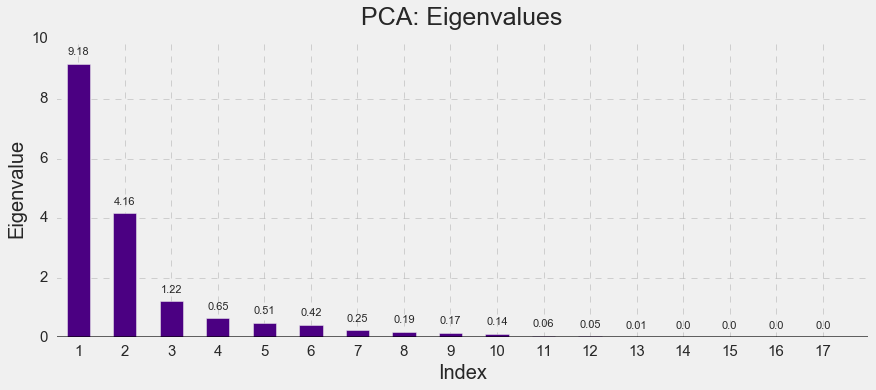

In [67]:
plt.style.use('bmh')
plt.style.use('fivethirtyeight')

eigs = pd.DataFrame(eigenValues)

ax=eigs.plot.bar(color = 'indigo',legend=None,figsize=(13,5))
plt.title('PCA: Eigenvalues', fontsize = 25, y = 1.03)
plt.ylabel('Eigenvalue', fontsize = 20)
plt.xlabel('Index', fontsize = 20)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(range(-1, len(eigs)), rotation=0, fontsize = 15)
for i, label in enumerate(list(eigs.index)):
    score = eigs.ix[label][0].round(2)
    ax.annotate(str(score), (i, score + .3),ha='center', size=11) 
ax.set_xticklabels(range(0,18))
plt.yticks(fontsize = 15)
plt.xlim([-.5, len(eigs)])
plt.grid(color='gray', linestyle='--', alpha=.3)
plt.show()

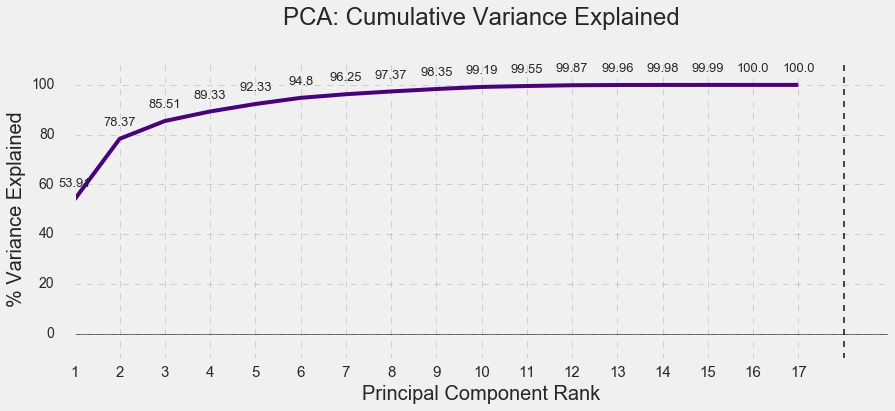

In [68]:

eigs = pd.DataFrame(cvarex)

plt.style.use('bmh')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,5))
ax = plt.gca()
ax.set_ylabel('% Variance Explained', fontsize=20)
ax.set_xlabel('Principal Component Rank', fontsize=20)

ax.set_title('PCA: Cumulative Variance Explained', fontsize=24, y = 1.10)
ax.axvline(len(eigs), color='black', linestyle='dashed', alpha = 0.7, linewidth=2)
ax.plot(cvarex, color = 'indigo', linewidth = 4)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
for i, label in enumerate(list(eigs.index)):
    score = eigs.ix[label][0].round(2)
    ax.annotate(str(score), (i, score + 4),ha='center', va="bottom", size=13)  
#plt.xlim([-1, len(eigs)+2])
plt.ylim([-10, 110])
ax.set_xticklabels(range(1,18))
plt.xticks(range(0,17, 1), fontsize=15)
ax.tick_params(axis='y', which='major', pad=20,labelsize=14)
plt.axhline(0, color='black', alpha = 0.5, linewidth = 1)
plt.axvline(0, color='black', alpha = 0.5, linewidth = 1)
plt.grid(color='gray', linestyle='--', alpha=.3)
plt.show()

In [19]:
pcask = PCA(n_components=3)
print pcask.fit(X_scaled).components_ # See the eigenvectors
xPC = pcask.fit_transform(X_scaled) # Use the eigenvectors to transform xStand onto new axes

[[ 0.25885192  0.25856244 -0.16403238 -0.27252651 -0.14753752  0.20056695
   0.26942785  0.27543982  0.27938877  0.20144222  0.26722246  0.22120597
   0.21000452  0.26978265  0.26812843  0.2490268   0.25444485]
 [-0.27201661 -0.27262998 -0.35033858 -0.22987049 -0.40101409  0.34147483
  -0.04027149 -0.01939918  0.23585036  0.05481243 -0.17685623  0.11913483
   0.33438795 -0.1756687  -0.18689229 -0.27019983 -0.20487635]
 [ 0.08042275  0.08247427 -0.33007295  0.00240815 -0.0884481   0.25730877
  -0.4143432  -0.39593382 -0.0058805  -0.48508062  0.04518497 -0.28841959
   0.03846376  0.21062511  0.21894847  0.17614028  0.17300264]]


In [20]:
PCdf = pd.DataFrame(xPC, columns=['PC1','PC2','PC3'])

PCdf.head()

,PC1,PC2,PC3
0,-2.165824,-0.131516,-0.304239
1,-1.082065,0.883389,-0.144832
2,-1.000144,0.549565,-0.901445
3,-0.823584,0.994336,-0.360078
4,-1.592348,0.743179,-0.040472


In [21]:
df3 = pd.concat([PCdf, df_working,df['airport']], axis=1)

df3.head()


,PC1,PC2,PC3,dept_comp,arriv_comp,ontime_gate_dept,ontime_air_dept,ontime_gate_arriv,gate_delay,taxi_out_time,...,air_dept_delay,airborn_delay,taxi_in_delay,block_delay,gate_arrive_delay,dept_cancel,arriv_cancel,dept_diversions,arriv_diversions,airport
0,-2.165824,-0.131516,-0.304239,60371,56735,0.8019,0.7794,0.7984,11.19,13.84,...,12.43,1.88,0.79,3.39,12.28,330.0,289.0,55.0,28.0,SJU
1,-1.082065,0.883389,-0.144832,57736,54870,0.7789,0.7464,0.7604,12.74,14.14,...,14.43,1.63,1.36,4.04,14.65,315.0,282.0,64.0,36.0,SJU
2,-1.000144,0.549565,-0.901445,55707,52948,0.8054,0.7446,0.7611,11.61,15.75,...,14.34,1.73,1.29,4.19,14.17,257.0,233.0,63.0,44.0,SJU
3,-0.823584,0.994336,-0.360078,47987,47246,0.8014,0.7522,0.7414,12.53,15.22,...,14.97,1.55,1.71,4.09,16.31,307.0,278.0,70.0,42.0,SJU
4,-1.592348,0.743179,-0.040472,44493,43448,0.8004,0.7810,0.7533,12.54,14.22,...,13.59,1.64,1.25,3.75,15.18,238.0,197.0,78.0,29.0,SJU


In [22]:
df4=df.iloc[:, 0:14]
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 14 columns):
key           799 non-null float64
airport       799 non-null object
ap_name       799 non-null object
alias         799 non-null object
fac_type      799 non-null object
faa_region    799 non-null object
county        799 non-null object
city          799 non-null object
state         799 non-null object
ap_type       799 non-null object
latitude      799 non-null float64
longitude     799 non-null float64
bound_data    799 non-null object
year          799 non-null int64
dtypes: float64(3), int64(1), object(10)
memory usage: 87.5+ KB


In [23]:
df5 = pd.concat([PCdf, df_working, df4], axis=1)

df5.head()

,PC1,PC2,PC3,dept_comp,arriv_comp,ontime_gate_dept,ontime_air_dept,ontime_gate_arriv,gate_delay,taxi_out_time,...,fac_type,faa_region,county,city,state,ap_type,latitude,longitude,bound_data,year
0,-2.165824,-0.131516,-0.304239,60371,56735,0.8019,0.7794,0.7984,11.19,13.84,...,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,2004
1,-1.082065,0.883389,-0.144832,57736,54870,0.7789,0.7464,0.7604,12.74,14.14,...,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,2005
2,-1.000144,0.549565,-0.901445,55707,52948,0.8054,0.7446,0.7611,11.61,15.75,...,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,2006
3,-0.823584,0.994336,-0.360078,47987,47246,0.8014,0.7522,0.7414,12.53,15.22,...,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,2007
4,-1.592348,0.743179,-0.040472,44493,43448,0.8004,0.7810,0.7533,12.54,14.22,...,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,2008


In [24]:
# This data set I will need to graph my data in Tableau
df5.to_csv(path_or_buf="/Users/Marina/Documents/GA Data Science/projects/projects-weekly/project-07/data_for_tableau.csv", index=False)

## Plotting principal components by airport and year

<img src="fig31.PNG">

<img src="fig41.PNG">

<img src="fig51.PNG">

## Plotting principal components against each other

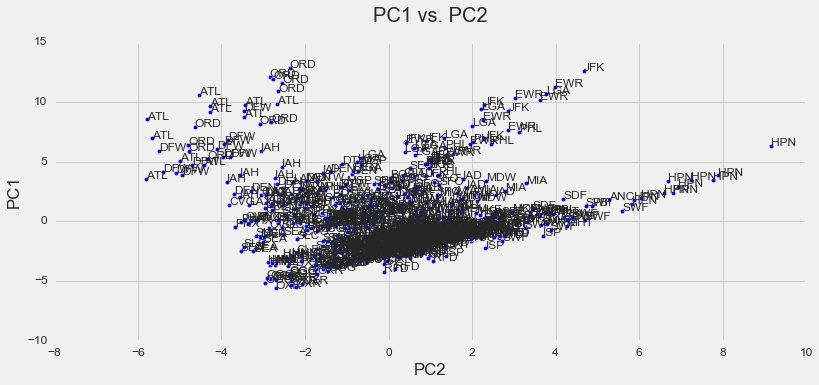

In [25]:
ax1 = df3.plot(kind='scatter', x='PC2', y='PC1', figsize=(12,5))

plt.title('PC1 vs. PC2', \
          fontsize = 20, y = 1.05)

for i, airport in enumerate(df3['airport']):
    ax1.annotate(airport, (df3.iloc[i].PC2, df3.iloc[i].PC1),fontsize=12)

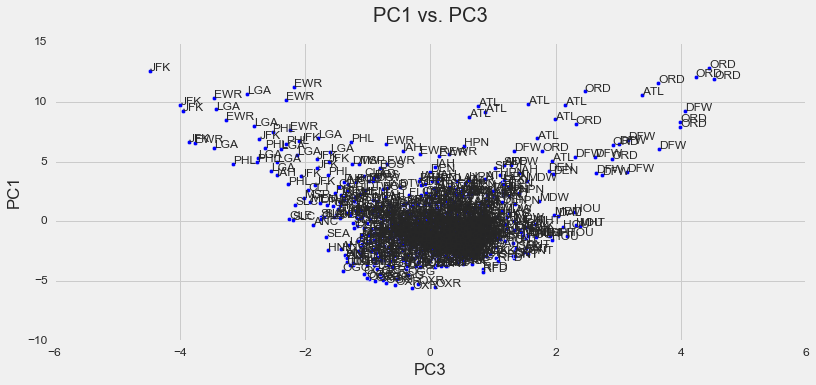

In [26]:
ax2 = df3.plot(kind='scatter', x='PC3', y='PC1', figsize=(12,5))

plt.title('PC1 vs. PC3', \
          fontsize = 20, y = 1.05)

for i, airport in enumerate(df3['airport']):
    ax2.annotate(airport, (df3.iloc[i].PC3, df3.iloc[i].PC1),fontsize=12)

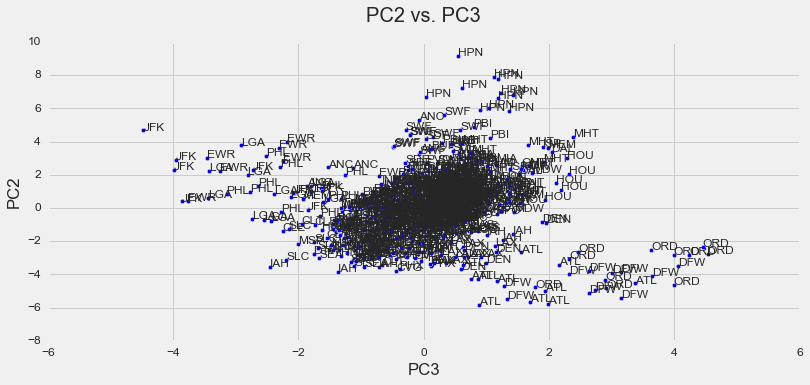

In [27]:
ax3 = df3.plot(kind='scatter', x='PC3', y='PC2', figsize=(12,5))

plt.title('PC2 vs. PC3', \
          fontsize = 20, y = 1.05)

for i, airport in enumerate(df3['airport']):
    ax3.annotate(airport, (df3.iloc[i].PC3, df3.iloc[i].PC2),fontsize=12)

In [28]:
df10 = df_working.copy()

df10 = (df_working - df_working.mean()) / df_working.std()

df10['PC1'] = PCdf['PC1']
df10['PC2'] = PCdf['PC2']
df10['PC3'] = PCdf['PC3']



In [29]:
melted_df = pd.melt(df10, id_vars=['PC1','PC2','PC3'])

In [30]:
melted_df.head()

,PC1,PC2,PC3,variable,value
0,-2.165824,-0.131516,-0.304239,dept_comp,-0.541516
1,-1.082065,0.883389,-0.144832,dept_comp,-0.568387
2,-1.000144,0.549565,-0.901445,dept_comp,-0.589079
3,-0.823584,0.994336,-0.360078,dept_comp,-0.667807
4,-1.592348,0.743179,-0.040472,dept_comp,-0.703438


## Plotting principal components against features

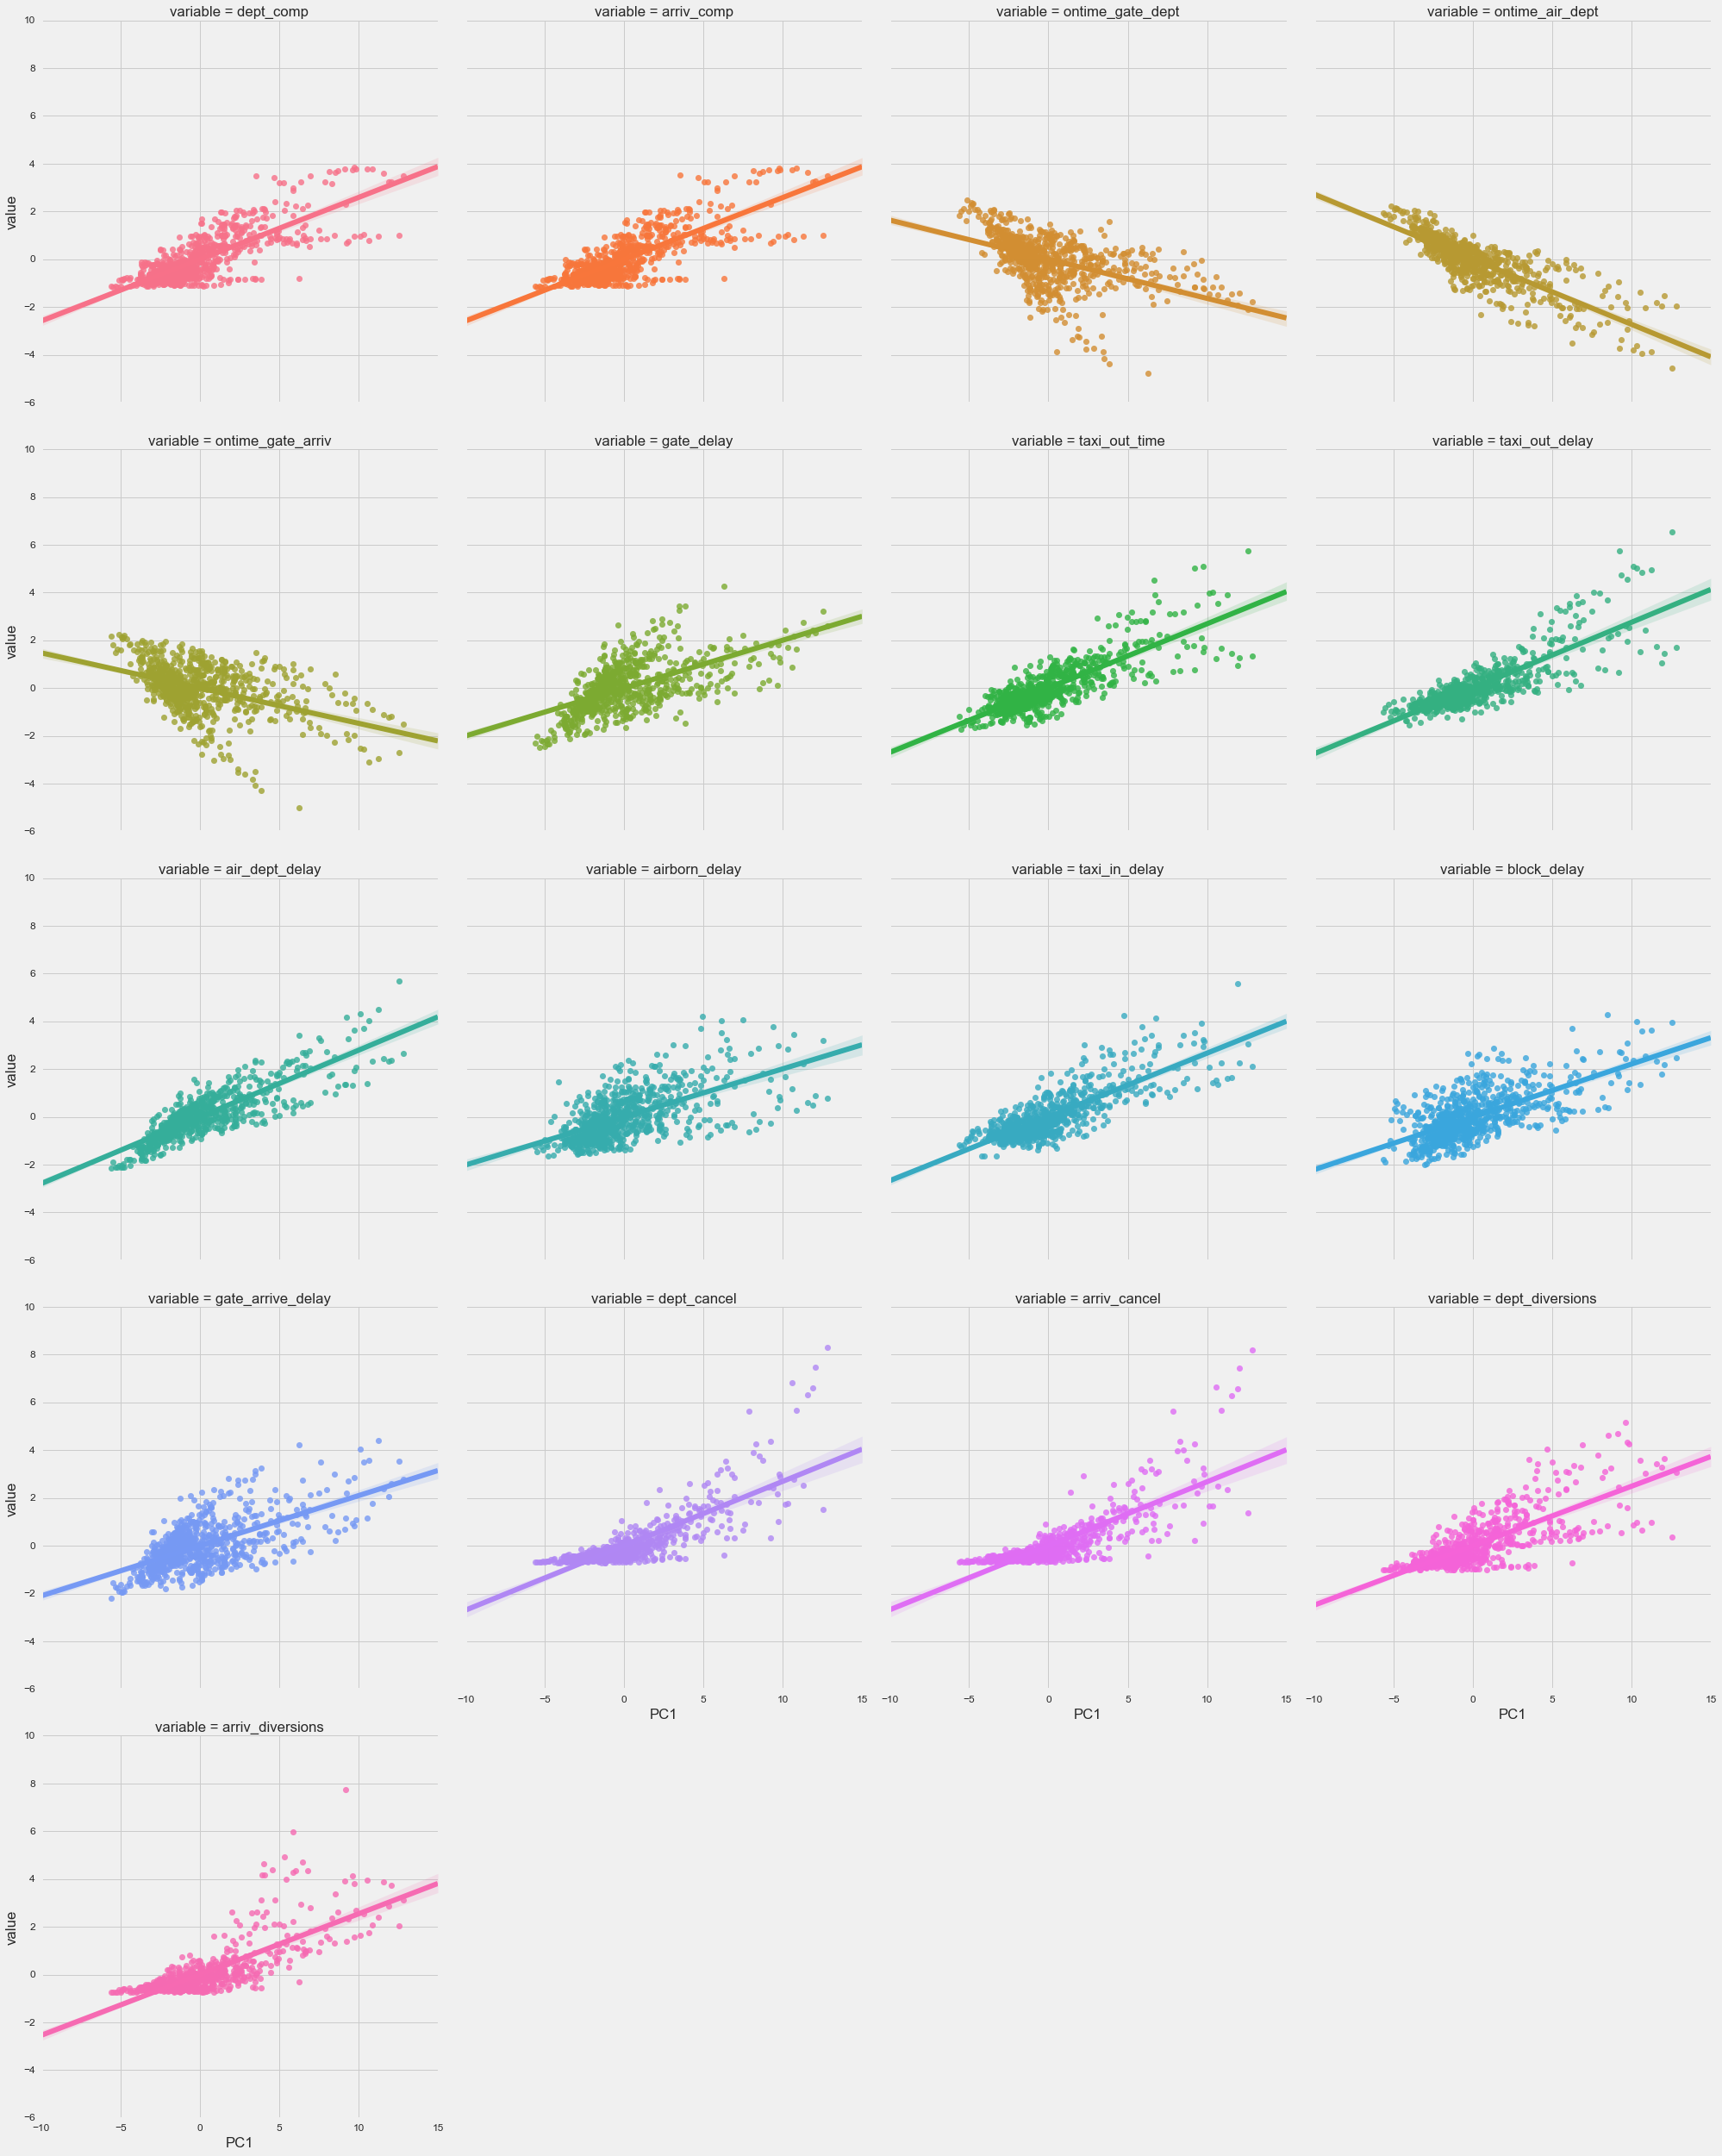

In [31]:

pca1=sns.lmplot(x="PC1", y="value", col="variable", hue="variable", 
                 data=melted_df, col_wrap=4, size=7, scatter_kws={'s':50})


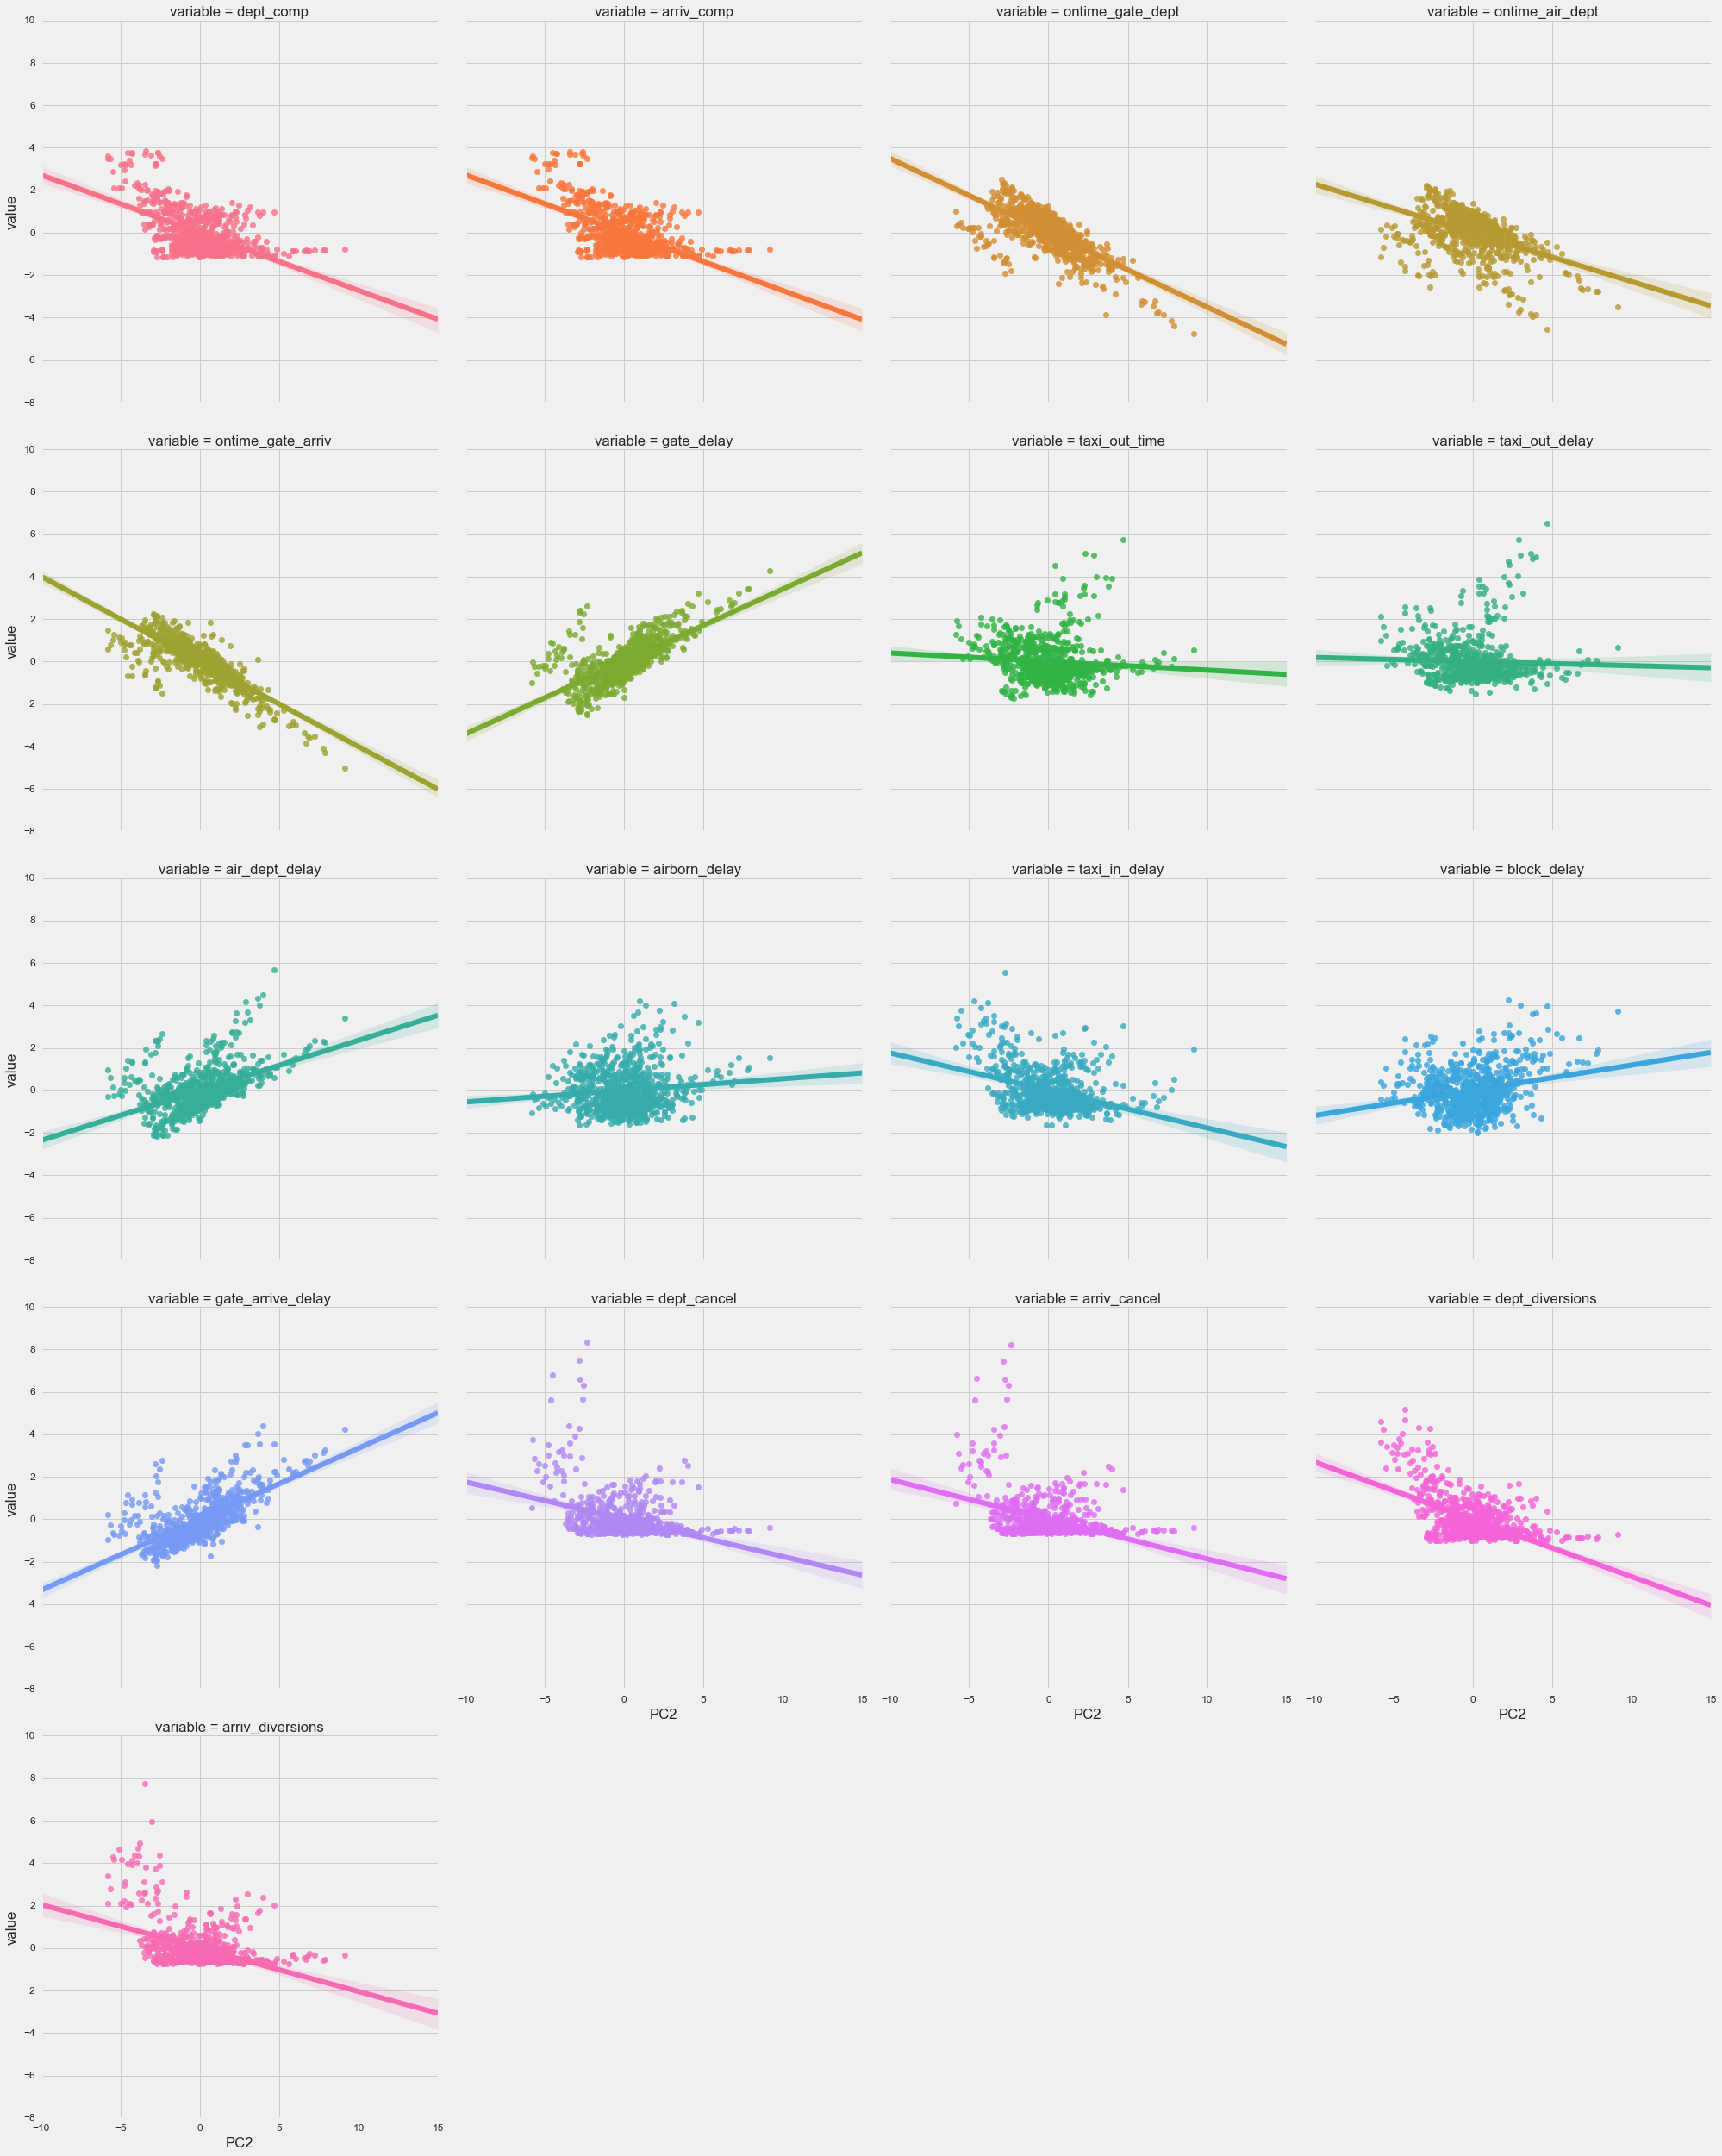

In [32]:
pc2 = sns.lmplot(x="PC2", y="value", col="variable", hue="variable", 
                 data=melted_df, col_wrap=4, size=7, scatter_kws={'s':50})

## Conducting K-means analysis

In [33]:

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(X_scaled)

In [34]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [35]:
print(centroids)

[[-0.33830542 -0.34144788 -0.89330418 -0.50026678 -0.79482037  0.84458155
  -0.16898622 -0.21601361  0.49827465  0.01986582 -0.23157834  0.30940607
   0.66313273 -0.28611691 -0.29376923 -0.33281356 -0.30059324]
 [ 1.66886769  1.67034651 -0.35710592 -1.208766   -0.3346219   0.5898641
   1.56852586  1.63719768  1.23026594  1.06664006  1.68467516  1.01613475
   0.76879219  1.6604165   1.65706025  1.63372887  1.69725507]
 [-0.30258606 -0.30126466  0.6047303   0.63591085  0.54303641 -0.64607168
  -0.3676963  -0.36163533 -0.64113217 -0.32540824 -0.36692196 -0.47242686
  -0.59733549 -0.32927777 -0.3240099  -0.29530278 -0.33203811]]


In [36]:
metrics.silhouette_score(df_working, labels, metric='euclidean')

#Becasue my score is very low, I will decrease the number of K-means clusters to two..

0.026937109486337651

In [37]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(X_scaled)

In [38]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [39]:
print(centroids)

[[-0.38767744 -0.38741765  0.13279478  0.30619587  0.1133324  -0.1803991
  -0.36677479 -0.36399912 -0.30829505 -0.26500105 -0.39131819 -0.25928756
  -0.20435523 -0.35694498 -0.35829548 -0.36477708 -0.35776458]
 [ 1.39251955  1.39158638 -0.47699275 -1.09984149 -0.40708476  0.64798528
   1.31743819  1.30746809  1.10738165  0.95187158  1.40559693  0.93134901
   0.73403459  1.28212995  1.28698088  1.31026248  1.28507392]]


In [40]:
metrics.silhouette_score(df_working, labels, metric='euclidean')

# My score has significantly improved.

0.55871064206836374

In [41]:
inertia = kmeans.inertia_
inertia

8794.6843593928861

In [42]:
# Now, I will identify K-means clusters for the principal components from PCA. 

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(xPC)

In [43]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [44]:
print(centroids)

[[-1.27632837  0.19322308  0.03324869]
 [ 4.58451282 -0.69404842 -0.11942778]]


In [45]:
metrics.silhouette_score(df_working, labels, metric='euclidean')

0.55871064206836374

In [46]:
inertia = kmeans.inertia_
inertia

#Although, it did not improve the silhouette score, it did improve the inertia score. 

6829.6409873187249

In [47]:
df3['cluster'] = pd.Series(clusters.labels_)
df3['cluster'].value_counts()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 22 columns):
PC1                  799 non-null float64
PC2                  799 non-null float64
PC3                  799 non-null float64
dept_comp            799 non-null int64
arriv_comp           799 non-null int64
ontime_gate_dept     799 non-null float64
ontime_air_dept      799 non-null float64
ontime_gate_arriv    799 non-null float64
gate_delay           799 non-null float64
taxi_out_time        799 non-null float64
taxi_out_delay       799 non-null float64
air_dept_delay       799 non-null float64
airborn_delay        799 non-null float64
taxi_in_delay        799 non-null float64
block_delay          799 non-null float64
gate_arrive_delay    799 non-null float64
dept_cancel          799 non-null float64
arriv_cancel         799 non-null float64
dept_diversions      799 non-null float64
arriv_diversions     799 non-null float64
airport              799 non-null object
cluster           

## Plotting K-means clusters with principal components 

In [48]:
df3_copy=df3.copy(deep=True)

df3_copy['cluster']=df3_copy['cluster'].apply(lambda x: 'Cluster 1' if x==0 else 'Cluster 2')

df3_copy['cluster'].value_counts()

df3_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 22 columns):
PC1                  799 non-null float64
PC2                  799 non-null float64
PC3                  799 non-null float64
dept_comp            799 non-null int64
arriv_comp           799 non-null int64
ontime_gate_dept     799 non-null float64
ontime_air_dept      799 non-null float64
ontime_gate_arriv    799 non-null float64
gate_delay           799 non-null float64
taxi_out_time        799 non-null float64
taxi_out_delay       799 non-null float64
air_dept_delay       799 non-null float64
airborn_delay        799 non-null float64
taxi_in_delay        799 non-null float64
block_delay          799 non-null float64
gate_arrive_delay    799 non-null float64
dept_cancel          799 non-null float64
arriv_cancel         799 non-null float64
dept_diversions      799 non-null float64
arriv_diversions     799 non-null float64
airport              799 non-null object
cluster           

In [49]:
colors = {'Cluster 1' : 'indigo', 'Cluster 2' : 'olive'}
liq_list = ['Cluster 1', 'Cluster 2']

df3_copy['cluster'].value_counts()

Cluster 1    625
Cluster 2    174
Name: cluster, dtype: int64

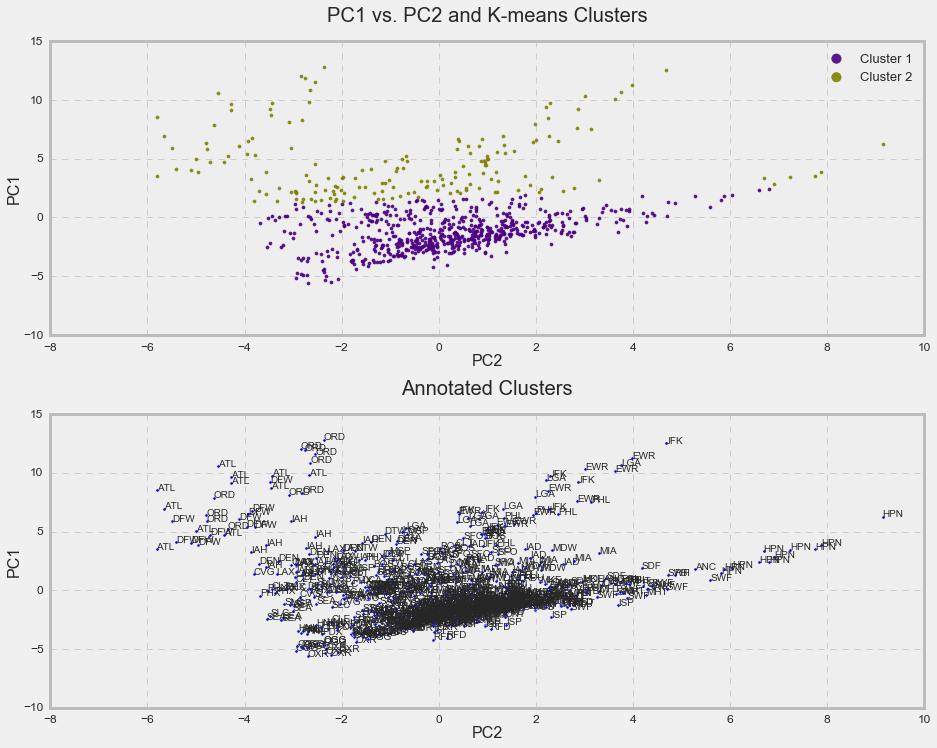

In [69]:
plt.style.use('bmh')
# plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(2,1, figsize=(13,10))
plt.tight_layout(h_pad=4)
for i in liq_list:
    y = df3_copy[df3_copy['cluster'] == i]
    ax[0].scatter(y['PC2'],y['PC1'] , color = colors[i],s=10,\
    label = i, alpha=.9)
ax[0].set_title("PC1 vs. PC2 and K-means Clusters", y=1.05)   
ax[0].legend(loc='upper right', fontsize = 13,markerscale=3) 
ax[0].set_xlabel('PC2',fontsize=16,labelpad=1)
ax[0].set_ylabel('PC1',fontsize=16,labelpad=1)
ax[0].grid(color='gray', linestyle='--', alpha=.3)


ax[1].scatter(df3_copy['PC2'],df3_copy['PC1'] , s=10)
for i, airport in enumerate(df3['airport']):
    ax[1].annotate(airport, (df3_copy.iloc[i].PC2, df3_copy.iloc[i].PC1),fontsize=10)
ax[1].set_title("Annotated Clusters", y=1.05)
ax[1].set_xlabel('PC2',fontsize=16,labelpad=1)
ax[1].set_ylabel('PC1',fontsize=16,labelpad=1)
ax[1].grid(color='gray', linestyle='--', alpha=.3)

plt.show()

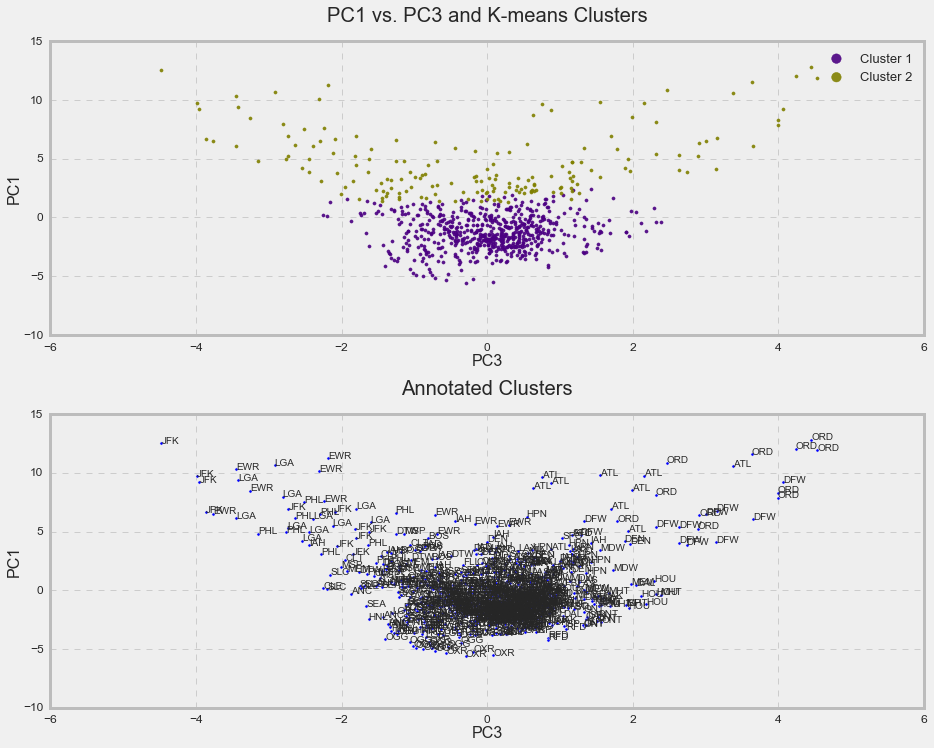

In [70]:
plt.style.use('bmh')
# plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(2,1, figsize=(13,10))
plt.tight_layout(h_pad=4)
for i in liq_list:
    y = df3_copy[df3_copy['cluster'] == i]
    ax[0].scatter(y['PC3'],y['PC1'] , color = colors[i],s=10,\
    label = i, alpha=.9)
ax[0].set_title("PC1 vs. PC3 and K-means Clusters", y=1.05)   
ax[0].legend(loc='upper right', fontsize = 13,markerscale=3) 
ax[0].set_xlabel('PC3',fontsize=16,labelpad=1)
ax[0].set_ylabel('PC1',fontsize=16,labelpad=1)
ax[0].grid(color='gray', linestyle='--', alpha=.3)


ax[1].scatter(df3_copy['PC3'],df3_copy['PC1'] , s=10)
for i, airport in enumerate(df3['airport']):
    ax[1].annotate(airport, (df3_copy.iloc[i].PC3, df3_copy.iloc[i].PC1),fontsize=10)
ax[1].set_title("Annotated Clusters", y=1.05)
ax[1].set_xlabel('PC3',fontsize=16,labelpad=1)
ax[1].set_ylabel('PC1',fontsize=16,labelpad=1)
ax[1].grid(color='gray', linestyle='--', alpha=.3)

plt.show()

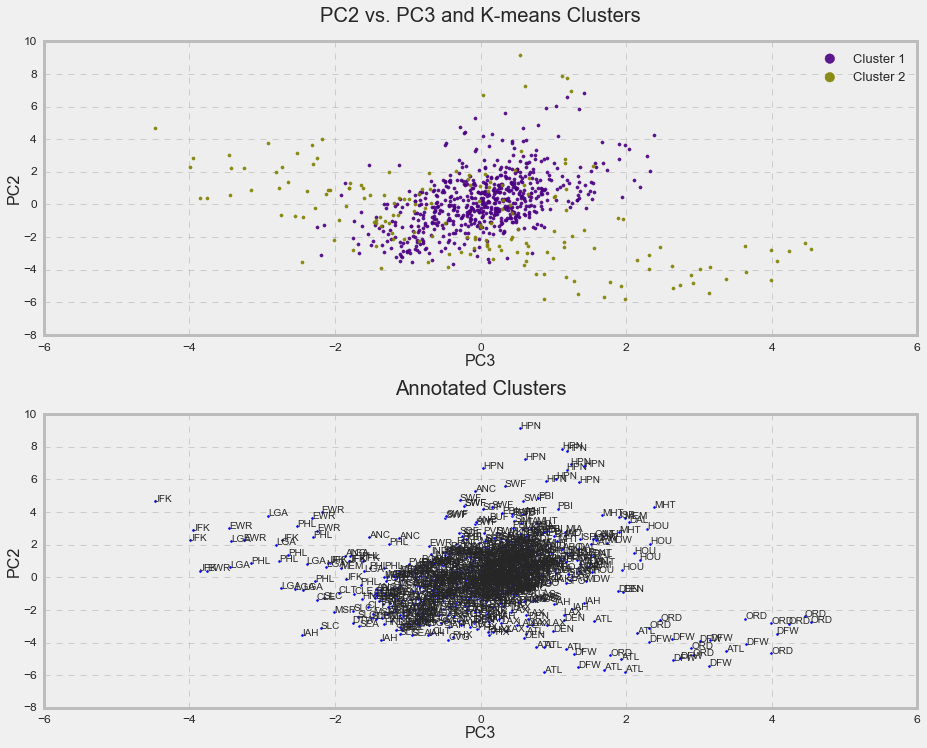

In [73]:
plt.style.use('bmh')
# plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(2,1, figsize=(13,10))
plt.tight_layout(h_pad=4)
for i in liq_list:
    y = df3_copy[df3_copy['cluster'] == i]
    ax[0].scatter(y['PC3'],y['PC2'] , color = colors[i],s=10,\
    label = i, alpha=.9)
ax[0].set_title("PC2 vs. PC3 and K-means Clusters", y=1.05)   
ax[0].legend(loc='upper right', fontsize = 13,markerscale=3) 
ax[0].set_xlabel('PC3',fontsize=16,labelpad=1)
ax[0].set_ylabel('PC2',fontsize=16,labelpad=1)
ax[0].grid(color='gray', linestyle='--', alpha=.3)


ax[1].scatter(df3_copy['PC3'],df3_copy['PC2'] , s=10)
for i, airport in enumerate(df3['airport']):
    ax[1].annotate(airport, (df3_copy.iloc[i].PC3, df3_copy.iloc[i].PC2),fontsize=10)
ax[1].set_title("Annotated Clusters", y=1.05)
ax[1].set_xlabel('PC3',fontsize=16,labelpad=1)
ax[1].set_ylabel('PC2',fontsize=16,labelpad=1)
ax[1].grid(color='gray', linestyle='--', alpha=.3)

plt.show()

### Creating a 3-Dimensional Plot of Principal Component Space

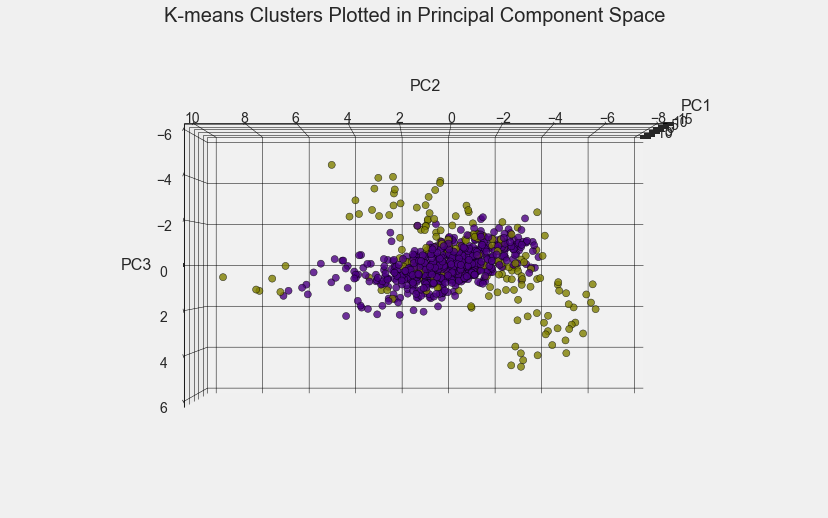

In [63]:
from ipywidgets import interact
import ipywidgets
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('fivethirtyeight')
#plt.style.use('bmh')

PCdf['colors']=pd.cut(df3['cluster'],2,labels=['indigo','olive'])
def twister(el, az):
    
    fig = plt.figure(figsize=(13,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set(xlabel="PC1",ylabel="PC2",zlabel="PC3")
    ax.scatter3D(PCdf["PC1"],PCdf["PC2"],PCdf["PC3"],s=50, color=PCdf['colors'],alpha=.8,edgecolor='k')
    ax.set_title("K-means Clusters Plotted in Principal Component Space", y=1.10, fontsize=20)
    ax.view_init(elev=el, azim=az)
    ax.tick_params(axis='both', which='both', pad=5,labelsize=14)
    ax.set_xlabel('PC1',fontsize=16, labelpad=10)
    ax.set_ylabel('PC2',fontsize=16, labelpad=20)
    ax.set_zlabel('PC3',fontsize=16, labelpad=10)
    ax.w_xaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})
    ax.w_yaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})
    ax.w_zaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})
    ax.w_xaxis.gridlines.set_lw(.5)
    ax.w_yaxis.gridlines.set_lw(.5)
    ax.w_zaxis.gridlines.set_lw(.5)
interact(twister,el=(0,360), az=(0,360));
# interact(twister, el=(0,50), az=(0,130));

#339 and 47
#15 130

# 20 107

## Conducting DBSCAN. DBSCAN is ideal for indentifying outliers within clusters. 

In [369]:
db = DBSCAN(eps=4, min_samples=10)

#3.8

In [379]:
X = StandardScaler().fit_transform(df_working)

c=db.fit(X)

In [380]:
core_samples = db.core_sample_indices_
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [381]:
#Identifying airports that are outliers 
df4=pd.concat([df3, pd.Series(db.labels_, name='lbl'),df['year']], axis=1)
df4[df4['lbl']==-1]

,PC1,PC2,PC3,dept_comp,arriv_comp,ontime_gate_dept,ontime_air_dept,ontime_gate_arriv,gate_delay,taxi_out_time,...,block_delay,gate_arrive_delay,dept_cancel,arriv_cancel,dept_diversions,arriv_diversions,airport,cluster,lbl,year
201,9.208671,-3.467400,4.067632,337258,336365,0.7186,0.6556,0.7341,17.25,16.84,...,4.98,17.23,9372.0,9767.0,600.0,1948.0,DFW,1,-1,2007
232,10.564734,-4.546014,3.373873,484570,480171,0.7413,0.6216,0.7337,15.50,18.52,...,4.62,17.23,13837.0,14480.0,790.0,1080.0,ATL,1,-1,2005
685,11.571344,-2.545331,3.635287,466079,467039,0.7036,0.5881,0.7100,19.66,19.33,...,5.59,21.15,12915.0,13808.0,766.0,1063.0,ORD,1,-1,2006
686,12.827315,-2.365258,4.453775,455562,455118,0.6854,0.5769,0.6909,20.81,19.02,...,5.73,22.44,16618.0,17571.0,707.0,887.0,ORD,1,-1,2007
687,12.046534,-2.846657,4.237358,431539,431421,0.7049,0.6115,0.7062,19.94,18.67,...,5.44,21.90,15050.0,16094.0,801.0,1027.0,ORD,1,-1,2008
693,11.905572,-2.764145,4.534959,430429,430750,0.6787,0.5784,0.7050,20.21,17.50,...,5.05,20.09,13454.0,14355.0,739.0,831.0,ORD,1,-1,2014


In [382]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X, labels))

Silhouette Coefficient: 0.626


/Users/Marina/anaconda/lib/python2.7/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


Silhouette Coefficient: 0.626


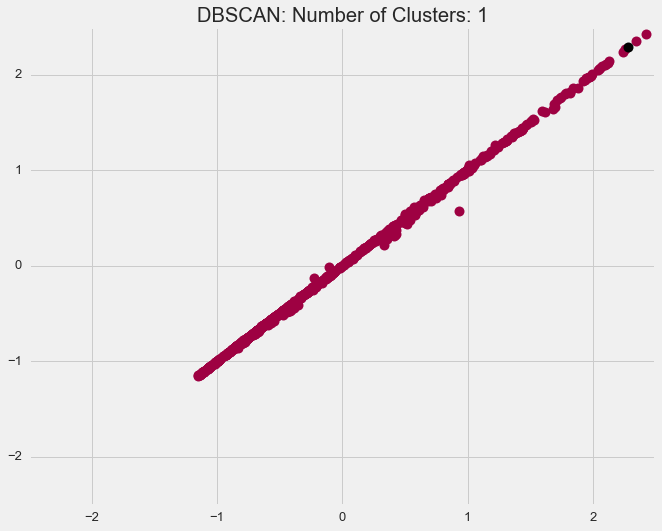

In [383]:
def plot_dbscan(db, X):
    fig = plt.figure(figsize=(10,8))
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10)
        
        
    plt.gca().set_xlim(-2.5,2.5)
    plt.gca().set_ylim(-2.5,2.5)
    plt.title('DBSCAN: Number of Clusters: %d' % n_clusters_);
    
plot_dbscan(db, X)

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X, labels))

In [371]:
df3.corr().head(3)

,PC1,PC2,PC3,dept_comp,arriv_comp,ontime_gate_dept,ontime_air_dept,ontime_gate_arriv,gate_delay,taxi_out_time,...,air_dept_delay,airborn_delay,taxi_in_delay,block_delay,gate_arrive_delay,dept_cancel,arriv_cancel,dept_diversions,arriv_diversions,cluster
PC1,1.000000e+00,-2.836452e-17,-1.465735e-17,0.783656,0.782779,-0.496596,-0.825055,-0.446659,0.607202,0.815674,...,0.845830,0.609852,0.808997,0.669685,0.635774,0.816748,0.811740,0.753911,0.770314,0.799013
PC2,-2.836452e-17,1.000000e+00,4.736210e-17,-0.554600,-0.555851,-0.714287,-0.468671,-0.817606,0.696215,-0.082107,...,0.480863,0.111754,-0.360583,0.242898,0.681766,-0.358162,-0.381045,-0.550896,-0.417712,-0.179614
PC3,-1.465735e-17,4.736210e-17,1.000000e+00,0.088645,0.090907,-0.363820,0.002654,-0.097491,0.283616,-0.456706,...,-0.006482,-0.534676,0.049805,-0.317908,0.042396,0.232160,0.241334,0.194149,0.190691,-0.057169


In [372]:
df12=df3.drop(['PC2','PC3','airport','cluster'], axis = 1)


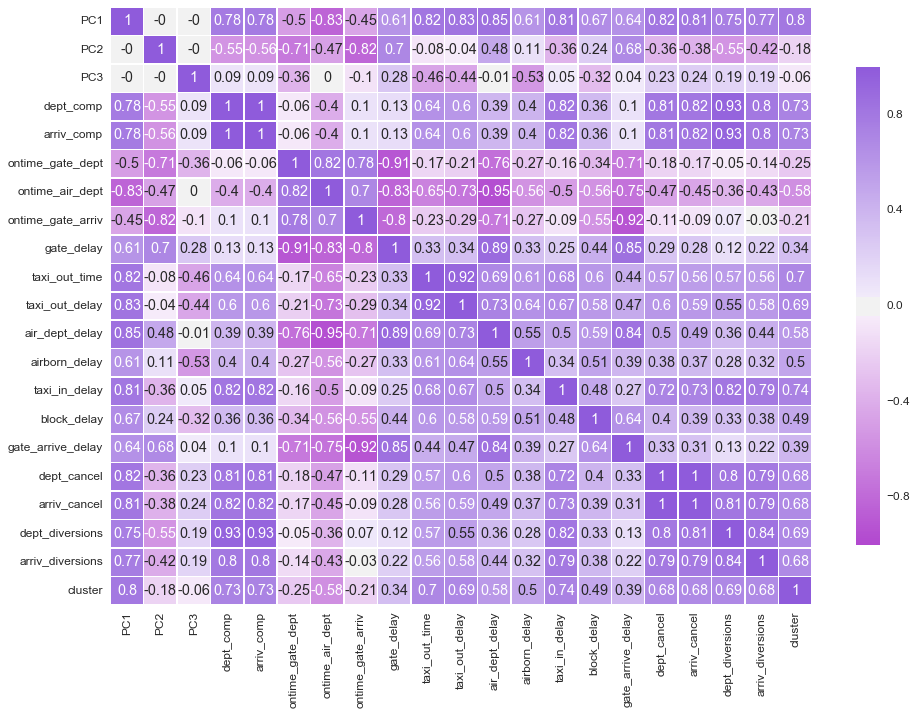

In [62]:
corr = df3.corr().round(decimals=2)
sns.set(font_scale=1.2)
plt.subplots( figsize=(14, 10))

cmap = sns.diverging_palette(295,278, as_cmap=True)
sns.heatmap (corr, annot=True,cmap=cmap,cbar_kws={"shrink": .8},linewidths=.5)



## SUMMARY OF FINDINGS:


The principal component analysis identified 3 major components (PC1, PC2, and PC3) that cumulatively explained 85% of variance for airport delays. PC1 explained 54% of all airport delays while PC1 and PC2 together explained 73% of all airport delays. PC1 was highly and positively correlated with all the features that I included in my PCA except on-time departure and arrival (here, PC1 was highly and negatively correlated with the features).  PC2 was highly and positively correlated only with the several features: gate delay, air departure delay, gate arrival delay. PC3 was highly and positively correlated with on-time gate departure, taxi out time, taxi out delay, airborn delay, and block delay. 

K-means analysis identified 2 major clusters (with Silhouette Coefficient of 0.56).The clusters overlapped with the 3 major principal components. First K-means cluster overlapped with PC1, while the second K-means cluster overlapped with PC2 and PC3.  The results of the two methods, however, are different: PCA helps to reduce the number of "features" while preserving the variance, whereas clustering reduces the number of "data-points" by summarizing several points by their expectations/means. 

DBSCAN analysis revealed only one major cluster with several outliers (with Silhouette Coefficient of 0.62). DBSCAN uses the concept of density reachability and density connectivity and is ideal for identifying outliers. Thus, DBSCAN analysis identified several outliers. Those were DFW (2007), ATL (2005), ORD (2006-2008 and 2014). These airports at the given years belonged to the cluster1 of K-means analysis, had high PC1 and low PC2 and PC3. 
